# DFT implementation from scracth
***
**Federal University of Campina Grande (Universidade Federal de Campina Grande)**

Author: **João Pedro Melquiades Gomes**

Email: **joao.melquiades@ee.ufcg.edu.br**
***
The DFT is one of the most used mathematical tools od the century. It consists in the Discrete Fourier Transform, and it is basically the Discrete Time Fourier Transform Time (DTFT) sampled. First, let's define the DTFT:

$$X(e^{j\omega}) = \sum_{n = -\infty}^{\infty} x[n] e^{-j\omega n}$$

Note that $X(e^{j\omega})$ is **continuous**, not discrete. The DTFT is also periodic with $T = 2\pi$. We can prove this calculating the $X(e^{j(\omega + 2\pi)})$ and we will see that $X(e^{j\omega}) = X(e^{j(\omega + 2\pi)})$.

So, we only need to represent one period of the DTFT to represent the epectrum. So, if we divide $2\pi$ into $N$ samples, we have the DFT:

$$X[k] = \sum_{n = 0}^{N-1} x[n] e^{-j\frac{2\pi k}{N}}$$

## Representation in matricial form
***

We can use the Vandermonde Matrix to represent the DFT. First, let's consider the following notation:
$$W_N = e^{-j\frac{2\pi}{N}}$$

Where N denotes the number of samples of DTFT, ie. the **FFT size**.

So, we can represent the FFT in matricial form:

$$X[k] = \begin{bmatrix}
1 & 1 & 1 & 1 & 1\\ 
1 & W_N^1 & W_N^2 & ... & W_N^{N-1}\\ 
1 & W_N^2 & W_N^4 & ... & W_N^{2(N-1)}\\ 
1 & ... & ... & ... & ...\\ 
1 & W_N^{N-1} & W_N^{2(N-1)} & ... & W_N^{(N-1)^2}
\end{bmatrix}
\begin{bmatrix}
x[0]\\ 
x[1]\\ 
x[2]\\ 
...\\ 
x[N-1]
\end{bmatrix}$$

### Implementating the algorithm using the Vandermond Matrix
***

In order to implement the algorithm, we will define a function that will receive the array of samples in discret time and the size of DFT. Then, it will build the Vandermond matrix and compute the DFT array $X[k]$

In [2]:
# Important imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [204]:
def dft(xn, N):
    '''Function to calculate the DFT of a given array x[n]'''

    # Padding with zeros if size of xn is less than N
    xn = np.pad(xn, (0, N - xn.size))
    xn = np.resize(xn, (xn.size, 1))

    # At this point, the size of xn must be equal to N
    assert xn.size == N

    # Defining the matrix

    vandermond = np.zeros((N, N), dtype='complex')
    WN = np.exp(-1j*2*np.pi/N)

    for i in range(N):
        vandermond[i] = [WN**(i*j) for j in range(N)]
    
    # Calculating the output
    Xk = np.dot(vandermond, xn)

    return Xk

Now, let's test the code with some inputs.

In [197]:
def dft_plots(xn, N, title):
    array_k = np.arange(0, N)
    array_m = np.arange(0, xn.size)
    
    Xk = dft(xn, N)

    plt.figure(figsize=(20, 10))

    ax1 = plt.subplot(2, 1, 1)
    ax2 = plt.subplot(2, 2, 3)
    ax3 = plt.subplot(2, 2, 4)

    ax1.stem(array_m, np.real(xn), linefmt=':g', markerfmt='ro')
    ax1.set_xlim(-1, xn.size/2)
    ax1.set_title(title)
    ax1.set_xlabel('Samples, $n$')
    ax1.set_ylabel('Magnitude')

    ax2.stem(array_k, np.abs(Xk), linefmt=':g', markerfmt='ro')
    ax2.set_title('Module of DFT')
    # ax2.set_xlim(-1, N/2)
    ax2.set_xlabel('Samples, $n$')
    ax2.set_ylabel('Magnitude')

    ax3.stem(array_k, np.angle(Xk)*180/np.pi, linefmt=':g', markerfmt='ro')
    ax3.set_title('Phase of DFT')
    # ax3.set_xlim(-1, N/2)
    ax3.set_xlabel('Samples, $n$')
    ax3.set_ylabel('Phase, º')

    plt.tight_layout()

    return Xk


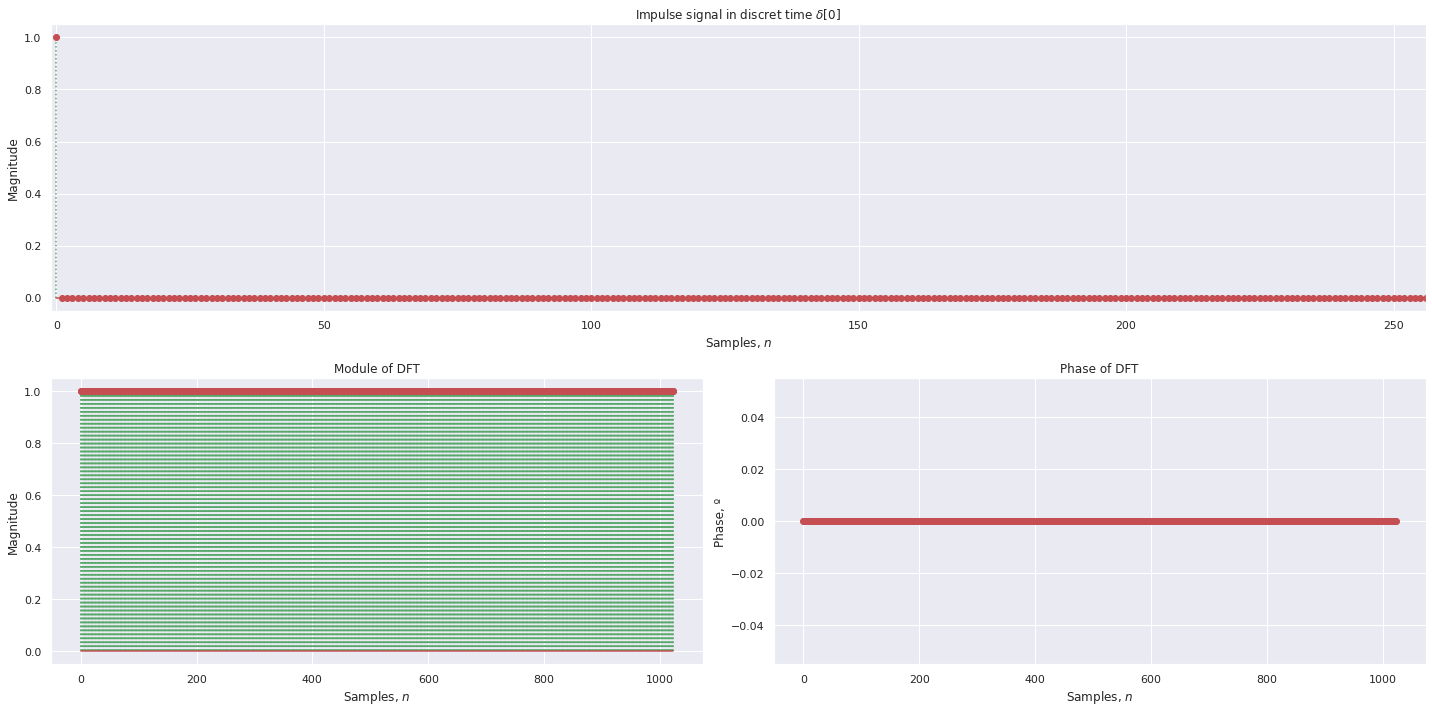

In [198]:
M = 512
N = 1024

# Impulse signal

xn1 = np.zeros(M, dtype='complex')
xn1[0] = 1.0
Xk1 = dft_plots(xn1, N, 'Impulse signal in discret time $\delta[0]$')

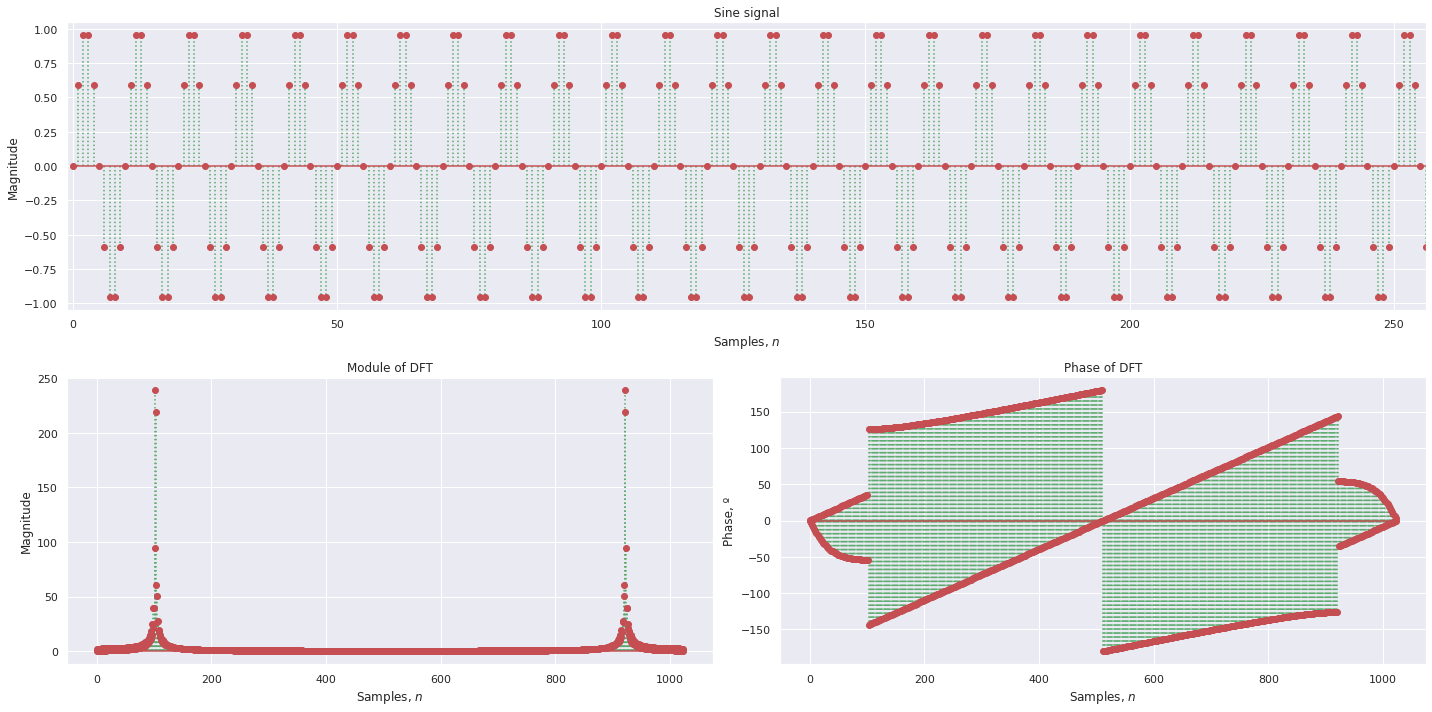

In [200]:
# Sine signal with a given sampling frequency of 10Hz and a fundamental frequency of 1Hz
f = 10
n = np.arange(M)
xn2 = np.sin(2*np.pi*n/f)
Xk2 = dft_plots(xn2, N, 'Sine signal')


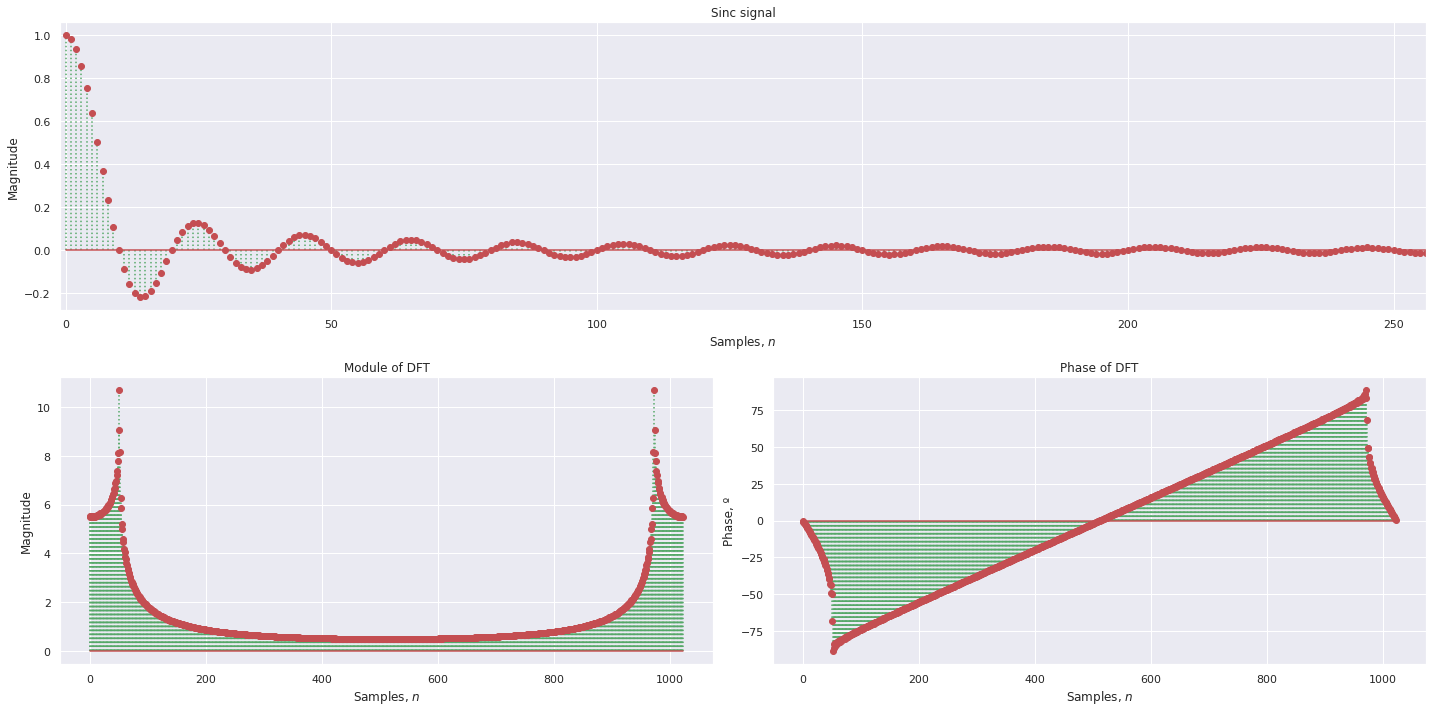

In [201]:
# sinc(n)

xn3 = np.sinc(n/f)
Xk3 = dft_plots(xn3, N, 'Sinc signal')

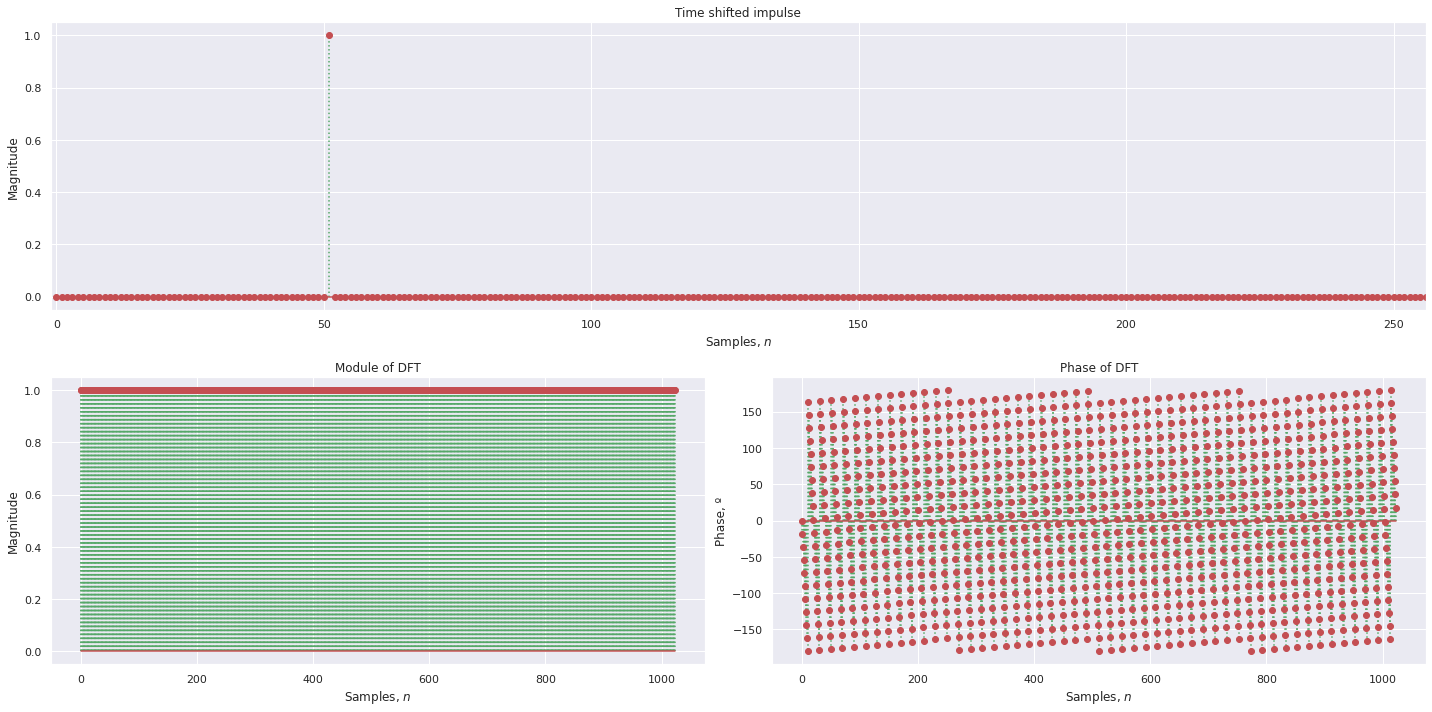

In [202]:
#Time shifted impulse

xn4 = np.zeros(M)
xn4[int(M/10)] = 1.0
Xk4 = dft_plots(xn4, N, 'Time shifted impulse')

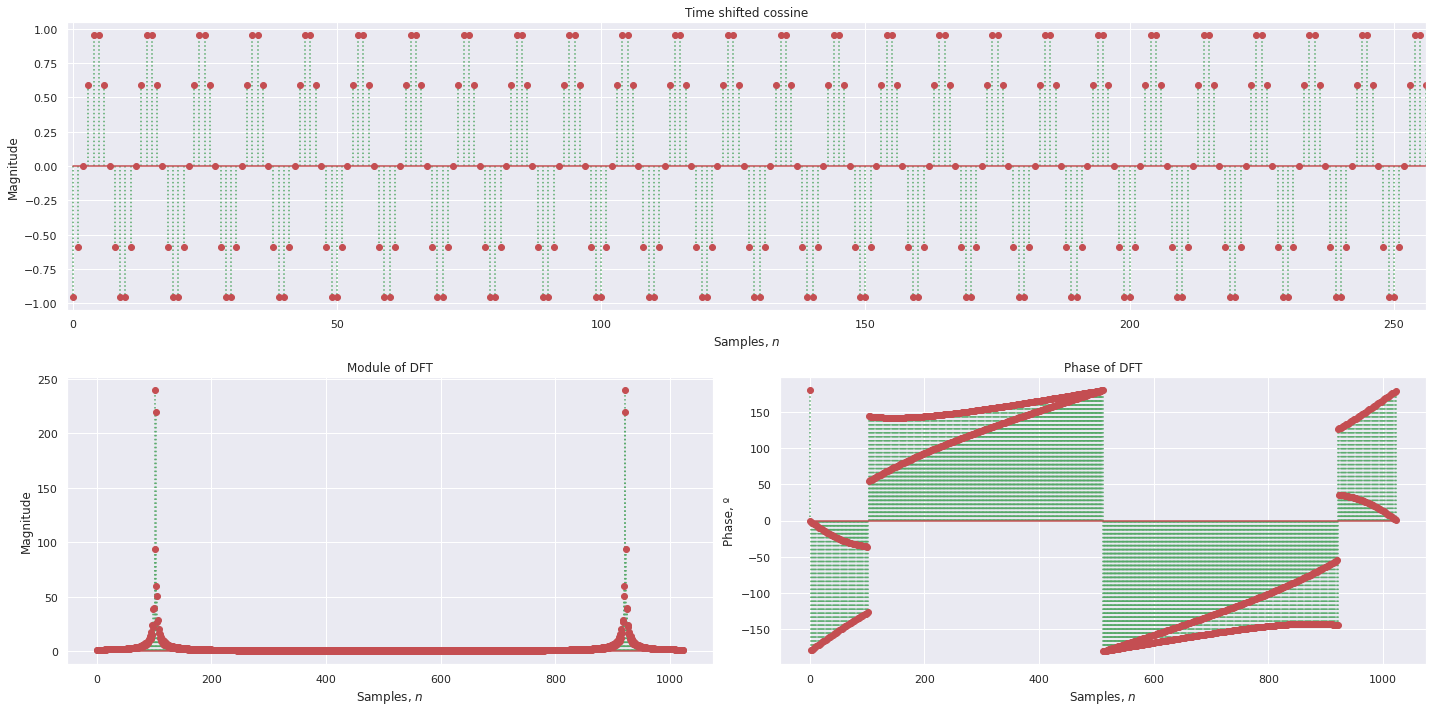

In [203]:
# Time shifted cosine

xn5 = np.sin(2*np.pi*(n-2)/f)
Xk5 = dft_plots(xn5, N, 'Time shifted cossine')

## Time analysis with greater N
***
Here, let's take one of the examples above and recalculate with diferent sizes of N (I will take two power factors only):


In [211]:
import time
array_N = 2**np.arange(3, 18)
time_array = np.zeros(array_N.size)
#The size of DFT will be the same of x[n]
f = 10
for i in range(array_N.size):
    
    n = np.arange(array_N[i].size)
    x = np.sinc(n/f)

    start_time = time.time()
    Xk = dft(x, array_N[i])
    end_time = time.time()
    time_array[i] = end_time - start_time
    print(f'Calculated to N={array_N[i]}. Time elapsed: {time_array[i]}')

Calculated to N=8. Time elapsed: 0.0010623931884765625
Calculated to N=16. Time elapsed: 0.0003058910369873047
Calculated to N=32. Time elapsed: 0.0006361007690429688
Calculated to N=64. Time elapsed: 0.0022628307342529297
Calculated to N=128. Time elapsed: 0.02278757095336914
Calculated to N=256. Time elapsed: 0.08022189140319824
Calculated to N=512. Time elapsed: 0.18950510025024414
Calculated to N=1024. Time elapsed: 0.5866913795471191
Calculated to N=2048. Time elapsed: 2.542628049850464
Calculated to N=4096. Time elapsed: 9.09013319015503
Calculated to N=8192. Time elapsed: 36.018898487091064
Calculated to N=16384. Time elapsed: 144.60842967033386
Calculated to N=32768. Time elapsed: 546.5402417182922


MemoryError: Unable to allocate 64.0 GiB for an array with shape (65536, 65536) and data type complex128

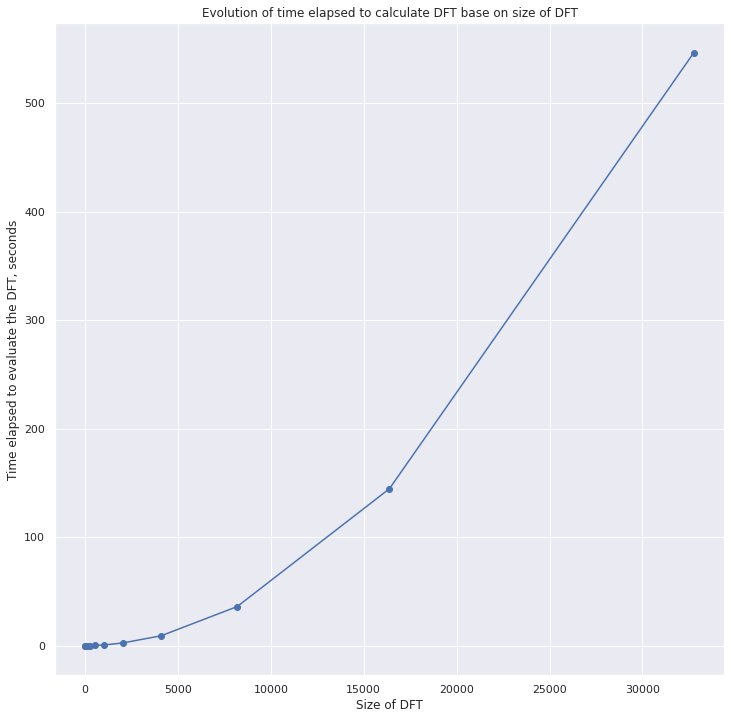

In [215]:
plt.figure(figsize=(12, 12))
plt.plot(array_N[:13], time_array[:13])
plt.scatter(array_N[:13], time_array[:13])
plt.title('Evolution of time elapsed to calculate DFT base on size of DFT')
plt.xlabel('Size of DFT')
plt.ylabel('Time elapsed to evaluate the DFT, seconds')
plt.show()

We can see that the Python informed an overflow in memory because of great size of matrix (That is a con when using matrix calculation, we need to starage the matrix), stopping execution to N = 65536. But we can see the time evolution until N=32768